<a href="https://colab.research.google.com/github/LazzyAF/GRIP-Tasks/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Shashank Boudh

In [1]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
#loading data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
#creating dependent and independent variable
x = df.iloc[:,1:-1].values
y_df = pd.get_dummies(df['Species'])
y = y_df.values


In [5]:
#creating train and test split with 25% data for testing
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)


In [6]:
print(x_train.shape,x_test.shape)

(112, 4) (38, 4)


In [7]:
#training our model
tree = DecisionTreeClassifier()
model = tree.fit(x_train, y_train)
model.score(x,y)

1.0

In [8]:
#making predictions on test data
y_pred = model.predict(x_test)

In [9]:
#testing the accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

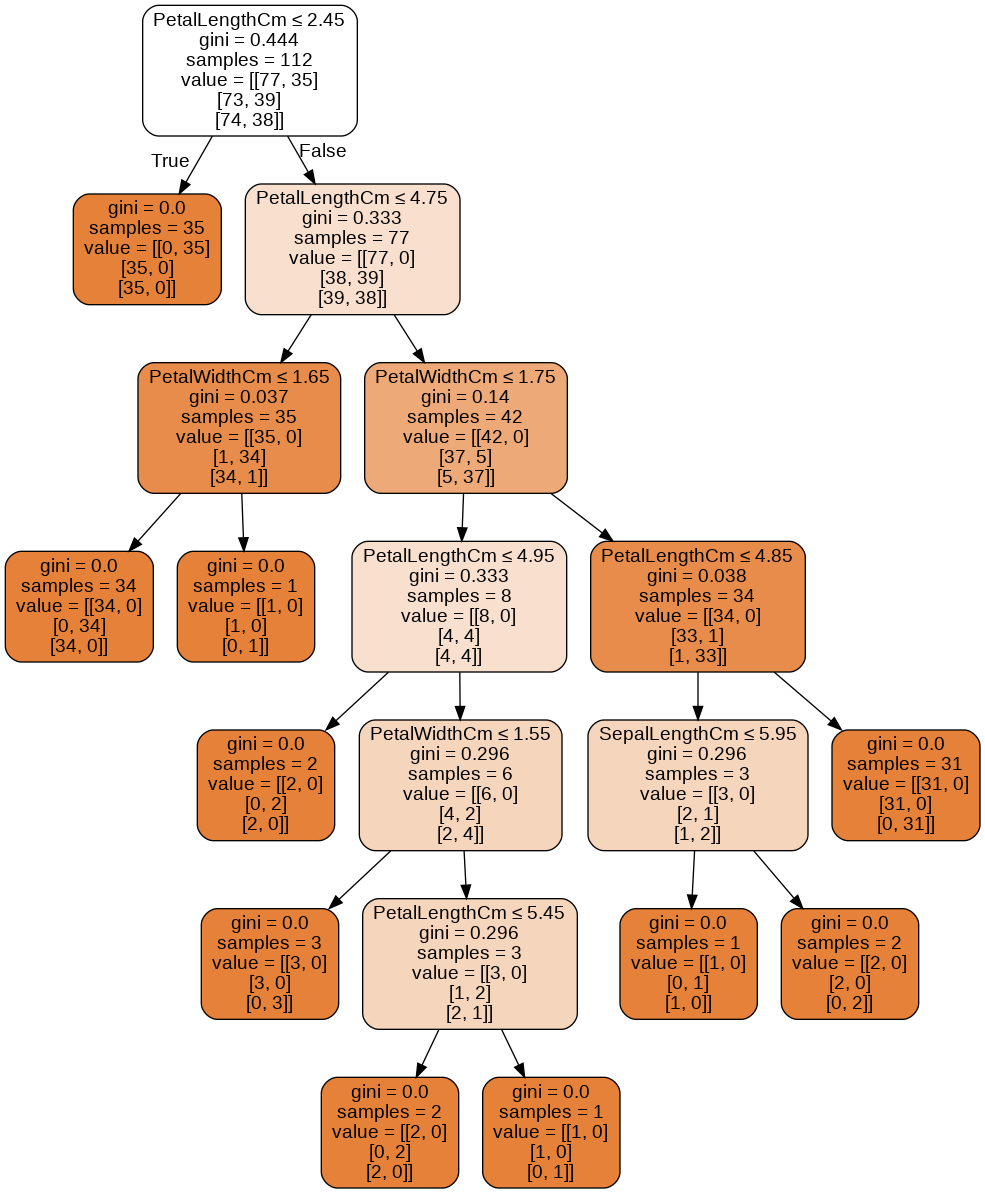

In [15]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the tree on the basis of our data provided
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=df.iloc[:,1:-1].columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())